Finding Ideal Sleep Duration By Sleep Monitoring
==================================

---
**Data Capstone Project (DCSP)**

**BBM469:** Data Intensive Applications Laboratory

**Instructors:** 
*   Fuat Akal 
*   Tuğba Gürgen Erdoğan 

**Prepared By:** 
* Mert Tazeoğlu `(21946606)`
* Yusuf Efe Kalaycı `(21827517)`

**Aims of This Project:** 
* Finding most important factors that effect sleep with using **data analysis methods**
* Developing a **effective machine learning model** to classify sleep data by quality of sleep
---

## Table of Contents
---
1- [Problem Definition](#cell-id-1)

2- [Loading Libraries](#cell-id-2)

3- [Data Understanding](#cell-id-3)

4- [Data Preparation](#cell-id-4)

5- [Modeling](#cell-id-5)

6- [Model Optimization](#cell-id-6)

7- [References](#cell-id-7)

<a name="cell-id-1"></a>
## 1- Problem Definition
---

Sleep is an essential function that allows your body and mind to recharge, leaving you refreshed and alert when you wake up. Healthy sleep also helps the body remain healthy and stave off diseases. **Without enough sleep, the brain cannot function properly**. This can impair your abilities to concentrate, think clearly, and process memories. [1]

Most adults require between seven and nine hours of nightly sleep. Children and teenagers need substantially more sleep, particularly if they are younger than five years of age. **Not only duration but also quality of sleep matters**. There are so many factors that affect sleep quality such as physical activity during the day, light, temperature, life style, REM stage duration, awake percentage, phone usage etc. [2]

A few important statistics about sleep, importance of sleep, insufficient sleep and sleep disorders are: [3]

*   **Almost half of all Americans** say they feel sleepy during the day between three and seven days per week.
*   Women have a lifetime risk of insomnia that is as much as **40% higher** than that of men. 
*   Around **25% of young children** have sleeping problems or experience excessive daytime sleepiness.
*   **57.8% of middle schoolers** and **72.7% of high school students** get less than the recommended amount of sleep for their age.
*   Around **75% of adults** with depression suffer from insomnia. 
* Some of the most serious potential problems associated with chronic sleep deprivation are high blood pressure, diabetes, heart attack, heart failure or stroke. Other potential problems include obesity, depression, reduced immune system function and lower sex drive. [3]

With using these information and statistics, we can say that quality sleep means **healthy & quality life and enhanced work performance**. This can be used for both of educational and business purposes. In this project we're aiming to **to find the most important factors affecting sleep** and **to measure and evaluate sleep performance**.

<a name="cell-id-2"></a>
## 2- Loading Libraries
---
In this project several libraries were used for several purposes. Used libraries are:
*   **`Numpy:`** To perform a wide variety of mathematical operations on datasets.
*   **`Pandas:`** To analyse and manipulate tabular data in different dataframes.
*   **`Sklearn:`** For machine learning, statistical modeling, dimensionality reduction etc.
*   **`Seaborn:`** To make statistical graphs also with using matplotlib and pandas.
*   **`Copy:`** To make deep copies of pandas dataframes and other data structures.
*   **`Warning:`** To ignore (prevent) show of unnecessary warnings.


In [ ]:
# Preprocessing libraries
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

# Machine learning model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Model evaulation libraries
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

# Other useful libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import copy

# Configuring the constants
pd.options.display.max_columns = None
pd.options.display.max_rows = None # Default is 60

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

<a name="cell-id-3"></a>
## 3- Data Understanding
---
Dataset that used in this project is about **sleep quality and behavioral health** of 24 university students collected using their smartwatches and smartphones for 7 consecutive days and nights. Dataset includes **168 instances (students) and 24 attributes (features)**. Details of preparation of dataset can be find in resourced part [4] [5].

Dataset includes important measurements and details about features of metabolism, performance in daily life, quality of sleep, efficiency of sleep etc. therefore this dataset is the best choice for this project. Moreover **only 1 column of dataset include null values** and that column is unnecessary for machine learning. Also dataset has already uploaded to COLAB and also it can be find in resources part [6].

### **3.1 - Import of Dataframe**

In [ ]:
# Identiting name of dataframe
df_name = "sleep_and_health_classification_df.csv"

# Column names (headers) are already identitied.

# Retrieving dataset
original_df = pd.read_csv(df_name)

# Displaying top 3 rows in order to get an impression about dataframe.
original_df.head(3)

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),sleep onset latency (minutes),duration in bed (minutes),efficiency (%),in bed time,out bed time,in bed awake duration (minutes),light sleep duration (minutes),deep sleep duration (minutes) (minutes),REM duration (minutes),awake percentage (%),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),night time phone usage / day (minutes),phone unlock count / day,label
0,1.0,1,3016,2.28,2151,32,455,29.0,518,88.0,9.050000,0.738194,58,270.0,65,125.0,11.0,57.0,12.548263,24.0,730,686,97,1
1,NaN,2,1790,1.39,2129,19,320,10.0,360,89.0,0.457639,0.707639,40,150.0,120,50.0,5.0,41.6,33.300000,13.8,532,425,75,1
2,NaN,3,2864,2.07,2032,29,453,23.0,504,90.0,0.349306,0.699306,46,267.0,56,135.0,9.0,54.0,11.111111,26.0,699,621,95,1


### **3.2 - Distribution of Dataframe**

In [ ]:
# Statistical summary of dataset
original_df.describe()

# Data is not scaled yet.
# Only subject column has missing values.

,subject,day,step count,distance travelled (km),calories burnt (kcal),acive time (minutes),actual sleep duration (minutes),sleep onset latency (minutes),duration in bed (minutes),efficiency (%),in bed time,out bed time,in bed awake duration (minutes),light sleep duration (minutes),deep sleep duration (minutes) (minutes),REM duration (minutes),awake percentage (%),light sleep percentage (%),deep sleep percentage (%),REM percentage (%),total phone usage / day (minutes),night time phone usage / day (minutes),phone unlock count / day,label
count,24.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,12.500000,4.000000,6225.803571,4.492500,500.619048,69.815476,413.297619,16.190476,445.982143,92.039150,0.308999,0.403286,32.500000,260.687500,60.053571,93.877976,7.712826,58.384151,13.386220,20.899453,473.773810,279.208333,130.154762,0.619048
std,7.071068,2.005979,4356.245120,3.256826,626.493385,45.475089,128.134639,12.708243,127.312594,6.264315,0.755299,0.116909,25.404983,83.063259,34.937285,36.160094,5.933381,6.685314,6.494401,5.524276,320.681903,202.262320,90.601383,0.577103
min,1.000000,1.000000,669.000000,0.120000,18.000000,10.000000,94.000000,0.000000,105.000000,69.623656,0.000694,0.065972,0.000000,57.000000,5.000000,0.000000,0.000000,41.600000,1.265823,0.000000,55.000000,23.000000,13.000000,0.000000
25%,6.750000,2.000000,2495.750000,1.780000,115.750000,31.000000,314.750000,7.375000,365.000000,88.754735,0.044271,0.336458,14.750000,207.000000,37.750000,69.437500,3.489055,54.118421,8.448647,18.290441,212.500000,122.750000,53.500000,0.000000
50%,12.500000,4.000000,5409.000000,3.770000,224.000000,61.500000,432.000000,14.250000,460.500000,93.221873,0.112153,0.393750,29.000000,269.500000,55.000000,95.000000,6.724445,58.393749,12.168803,20.307800,395.500000,235.500000,113.000000,1.000000
75%,18.250000,6.000000,9223.000000,6.332500,591.000000,94.750000,491.250000,21.250000,518.000000,96.545765,0.242014,0.469097,42.500000,315.937500,77.250000,115.000000,10.843656,63.078090,18.319937,22.147193,703.000000,366.000000,179.250000,1.000000
max,24.000000,7.000000,20134.000000,14.550000,2480.000000,216.000000,855.000000,68.500000,875.000000,107.826087,9.050000,0.934028,137.000000,510.000000,227.000000,196.000000,30.376344,81.000000,35.460993,41.000000,1436.000000,963.000000,407.000000,2.000000


### **3.3 - Target Column & It's Values**


1    88
0    72
2     8
Name: label, dtype: int64


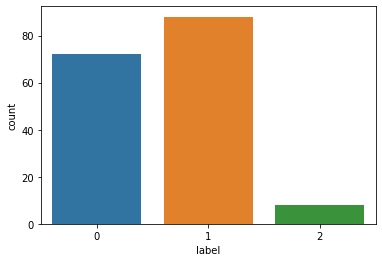

In [ ]:
# Showing distribution of target column
print(original_df['label'].value_counts())

# 0: Perfect & Very Good
# 1: Still Good & Not Bad
# 2: Bad & Needs Improvement

# Visualization of counts of classes
sns.countplot(x=original_df['label'], label="Count")

### **3.4 - Correlations of Dataframe**

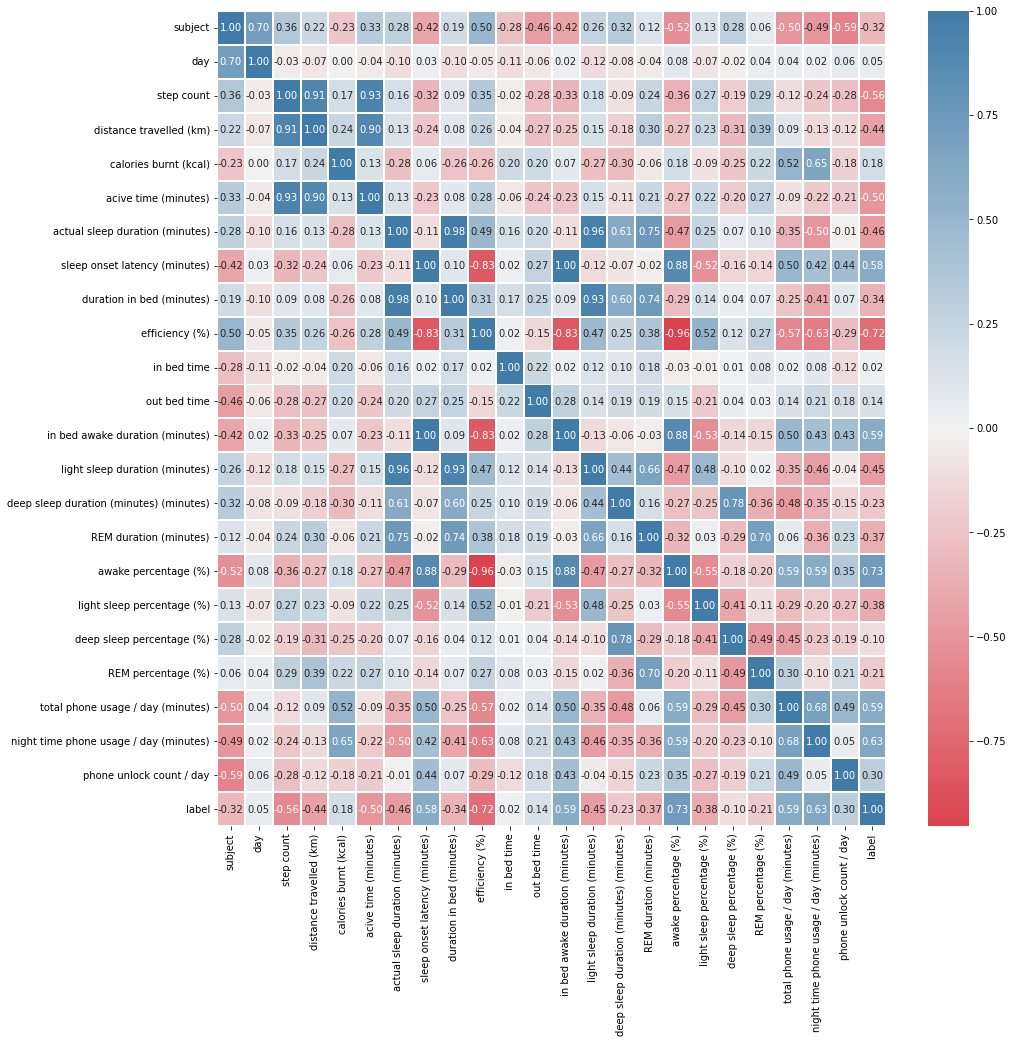

In [ ]:
# Defining variables
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
corr = original_df.corr()

# Increasing size of boxplot (otherwise not readable since it contains so many values)
fig, ax = plt.subplots(figsize=(15,15))

# Creating and plotting heatmap
sns.heatmap(corr, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f", ax=ax)
plt.show()

# This will be also used in dimensionality reduction part of data preparation stage. (4.7) 

<a name="cell-id-4"></a>
## 4- Data Preparation
---

### **4.1 - Dimensionality Reduction**
First of all, in order to prevent modifiying original dataset deep copy of dataframe should be created. Then, in order to boost performance of our machine learning model **columns with missing values** (na, NAN, NaN) and **unnecessary columns** for machine learning should be removed. Also **features with low variance** and **highly correlated features** can be removed too. [7] [8]


In [ ]:
# Part-1: Creating deep copy of dataframe
df = original_df.copy(deep = True)

# Checking the dimensions of dataframe
original_df.shape

(168, 24)

In [ ]:
# Part-2: Dropping columns with missing values which are weird for machine learning
df.dropna(axis=1, inplace=True)

# Checking reduced dimensions of dataframe
df.shape

# Luckily, only 1 column has missing values.
# Subject (ID's of patients) column is removed.

(168, 23)

In [ ]:
# Part-3: Dropping unnecessary columns which has no use for machine learning
df.drop(labels=['day'], axis=1, inplace=True) 

# Checking reduced dimensions of dataframe
df.shape

# Day (different testing days) column is removed.

(168, 22)

In [ ]:
# Part-4: Filtering out features with low variance

print("The original dataframe has {} columns".format(df.shape[1])  + "\n")

sel = VarianceThreshold(threshold=0.01)
sel.fit(df / df.mean())
mask = sel.get_support()

print("Features With Low Variance Are: ")
counter = 1;
for i in range(len(mask)):
  if (mask[i] == False):
      print(str(counter) + "- " + df.columns[i])
      counter += 1

df = df.loc[:, mask]
print("\n" + "The reduced_df dataframe has {} columns".format(df.shape[1]))

The original dataframe has 22 columns

Features With Low Variance Are: 
1- efficiency (%)

The reduced_df dataframe has 21 columns


In [ ]:
# Part-5: Filtering out highly correlated features

print("The reduced_df dataframe has {} columns".format(df.shape[1]) + "\n")
corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [c for c in tri_df.columns if any(tri_df[c] > 0.95)]
print("Highly Correlated Values Are: ")

for i in range(len(to_drop)):
  print(str(i+1) + "- " + to_drop[i])

df = df.drop(to_drop, axis=1)

print("\n" + "The reduced_df dataframe has {} columns".format(df.shape[1]))

# Dimensions reduced from 24 to 19. (%21 reduction)

The reduced_df dataframe has 21 columns

Highly Correlated Values Are: 
1- actual sleep duration (minutes)
2- sleep onset latency (minutes)

The reduced_df dataframe has 19 columns


### **4.2 - Checking Types of Data**
**Incompatitible data types such as strings or objects** are not only inconsistent and confusing but also slow to learn for machines. Therefore they **should be dropped or converted** to compatitible data types. Luckily there isn't any incompatitible data types in dataset.

In [ ]:
# Checking datatypes for each column of dataframe
df.dtypes

step count                                   int64
distance travelled (km)                    float64
calories burnt (kcal)                        int64
acive time (minutes)                         int64
duration in bed (minutes)                    int64
in bed time                                float64
out bed time                               float64
in bed awake duration (minutes)              int64
light sleep duration (minutes)             float64
deep sleep duration (minutes) (minutes)      int64
REM duration (minutes)                     float64
awake percentage (%)                       float64
light sleep percentage (%)                 float64
deep sleep percentage (%)                  float64
REM percentage (%)                         float64
total phone usage / day (minutes)            int64
night time phone usage / day (minutes)       int64
phone unlock count / day                     int64
label                                        int64
dtype: object

### **4.3 - Splitting Predictor and Target Sets**
**`Target Variable (X):`** The variables whose values are to be modeled and predicted by other variables. They were encoded at previous step. 

**`Predictor Variable (y):`** The independent variables which are used to predict target variables. They provide detailed information on an associated dependent variable regarding a particular outcome.

In [ ]:
# Splitting the data set into predictor(X) and target(y) sets
X = df.iloc[:, :-1].values
y = df['label'].values

### **4.4 - Splitting Train and Test Sets of Data**
Dataset should be splitted into train and test sets. But balance and distribution of datasets are important for performance of model.

- **Increasing Balance:** If train set is larger than expected, than model will be overfitted. Otherwise model will be underfitted. Therefore `test_size` parameter should be 0.25 which means %25 of dataset will be used for testing .
- **Optimizing Distribution:** Then there is no guarantee about distribution of dataset. For example if target columns are unbalanced (for example %90 of them are among in one category), then it has to be optimized. For this cross validation methods can be used. In order to achieve that, `stratify` parameter will used and aslo `random_state` parameters value is 42, since there is a common belief that it is more efficient since it selects data randomly. They're ways of more effective use of data.

**Note:** Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's. [9]

In [ ]:
# Splitting the dataset into 75% training set and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

# Creating deep copy of x_train in order to show differences
X_train_not_scaled = copy.deepcopy(X_train)

### **4.5 - Data Normalization (Scaling)**
Data normalization is the organization of data to appear similar across all records and fields. Not-normalized data columns are usually in different ranges. Therefore they are **harder to compare**. Moreover, columns with greater values will influence result more which means the **inability to objectively evaluate the effect of features**. Therefore, data should be normalized.

In [ ]:
# Scaling the data to bring all features to the same level of magnitude
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Not-scaled data has features which has different level of magnitudes
X_train_not_scaled

array([[9.2620e+03, 7.6300e+00, 2.5300e+02, ..., 2.8100e+02, 1.8900e+02,
        3.9000e+01],
       [1.1570e+04, 7.8600e+00, 3.8000e+02, ..., 2.0100e+02, 1.0300e+02,
        1.0200e+02],
       [6.2250e+03, 5.1200e+00, 1.6200e+02, ..., 2.6600e+02, 1.5400e+02,
        1.7200e+02],
       ...,
       [1.2241e+04, 8.3200e+00, 4.0200e+02, ..., 1.4500e+02, 7.4000e+01,
        5.6000e+01],
       [3.9860e+03, 3.0300e+00, 2.0360e+03, ..., 1.0140e+03, 7.4300e+02,
        7.2000e+01],
       [8.9980e+03, 4.8900e+00, 1.9800e+02, ..., 3.9300e+02, 3.2500e+02,
        1.6900e+02]])

In [ ]:
# Scaled data has features which has similar level of magnitudes
X_train

array([[0.43808146, 0.52044352, 0.1013805 , ..., 0.1844898 , 0.2153048 ,
        0.06598985],
       [0.55737027, 0.53638254, 0.15616911, ..., 0.11918367, 0.10376135,
        0.22588832],
       [0.28111433, 0.34650035, 0.06212252, ..., 0.1722449 , 0.16990921,
        0.4035533 ],
       ...,
       [0.59205086, 0.56826057, 0.16566005, ..., 0.07346939, 0.06614786,
        0.10913706],
       [0.16539177, 0.2016632 , 0.87057808, ..., 0.78285714, 0.93385214,
        0.14974619],
       [0.42443663, 0.33056133, 0.07765315, ..., 0.27591837, 0.39169909,
        0.39593909]])

<a name="cell-id-5"></a>
## 5- Modeling
---
A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data. [10] There are different machine learning models and according to the features of dataset, different models produces different accuracies. Therefore;
- In order to find best model, **different models can be used for same dataset and then accuracies can be compared**.
- After that, if it's not enough **performance of model can be boosted with several techniques**.

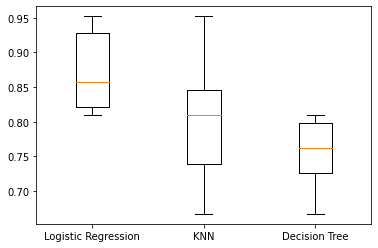

Logistic Regression Test Set Accuracy: 0.9047619047619048
KNN Test Set Accuracy: 0.8095238095238095
Decision Tree Test Set Accuracy: 0.7857142857142857


In [ ]:
# Defining different machine learning (classification) models
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree": DecisionTreeClassifier()}
results = []

# Looping through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Performing cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
  
  # Appending the results
  results.append(cv_scores)
  
# Creating a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

# Printing test results in order to compare models
for name, model in models.items():
  model.fit(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print("{} Test Set Accuracy: {}".format(name,test_score))

# Logistic regression is best of these models.

<a name="cell-id-6"></a>
## 6- Model Evaluation
---
Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as **its strengths and weaknesses**. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring. In this project model evaluation stage includes:
- In other to checking overfitting & underfitting, **testing model with both of train and test sets**
- Creating and visualizing **confusion matrix**; calculating model accuracy, precision, recall, f1-score etc. with using imported libraries
- Computing important metrics such as **recall, precision and accuracy** manually in order to see if everything checks out

In [ ]:
# Defining selected model
model = LogisticRegression()
model.fit(X_train, y_train)
print('Logistic Regression Training Accuracy (With Train Set):', model.score(X_train, y_train))

# Checking models performance with unseen data
y_hat = model.predict(X_test)
print('Logistic Regression Training Accuracy (With Test Set): ', model.score(X_test, y_test))

# According to these values, we can say that model is not either underfitted or overfitted. It's balanced.

Logistic Regression Training Accuracy (With Train Set): 0.8888888888888888
Logistic Regression Training Accuracy (With Test Set):  0.9047619047619048


In [ ]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_hat)

# Since we have 3 target values, our confusion matrix will be 3x3
true1 = cm[0][0]
true2 = cm[1][1]
true3 = cm[2][2]
false1 = cm[0][1]
false2 = cm[0][2]
false3 = cm[1][0]
false4 = cm[1][2]
false5 = cm[2][0]
false6 = cm[2][1]

print("Confusion Matrix:\n", cm, "\n")

print('Testing Accuracy = ', accuracy_score(y_test, y_hat))

# Check precision, recall, f1-score in a detailed report
print("\n----------------------")
print("Classification Report:")
print("----------------------")
print(classification_report(y_test, y_hat, zero_division=0))

# Scores of "2" in classification report are 0 since test set doesn't contain value about it.

Confusion Matrix:
 [[17  1  0]
 [ 1 21  0]
 [ 0  2  0]] 

Testing Accuracy =  0.9047619047619048

----------------------
Classification Report:
----------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.88      0.95      0.91        22
           2       0.00      0.00      0.00         2

    accuracy                           0.90        42
   macro avg       0.61      0.63      0.62        42
weighted avg       0.86      0.90      0.88        42



[Text(0, 0.5, 'Perfect Quality'),
 Text(0, 1.5, 'Average Quality'),
 Text(0, 2.5, 'Low Quality')]

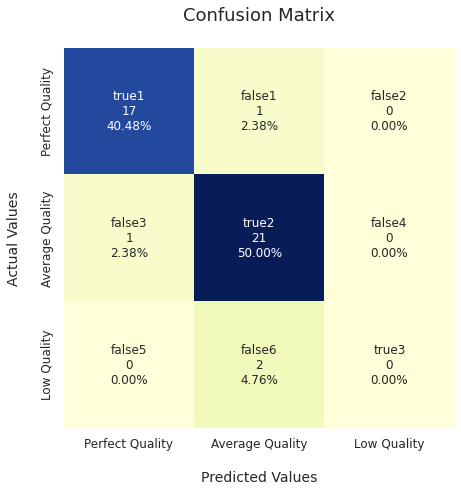

In [ ]:
# Visualizing confusion matrix
sns.set(color_codes=True)
plt.figure(1, figsize=(7, 7))
classes = ["Perfect Quality", "Average Quality", "Low Quality"]

group_names = ["true1","false1","false2","false3","true2","false4","false5","false6","true3"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap="YlGnBu", cbar=False)
ax.set_title('Confusion Matrix\n', size=18);
ax.set_xlabel('\nPredicted Values', size=14)
ax.set_ylabel('Actual Values\n', size=14);
ax.xaxis.set_ticklabels(classes, size = 12)
ax.yaxis.set_ticklabels(classes, size = 12)

In [ ]:
# Computing important metrics manually in order to see if everything checks out
# But things become different since it's a 3x3 matrix [11]
Accuracy = (true1+true2+true3) / (true1+true2+true3+false1+false2+false3+false4+false5+false6)

Recall = ((true1 / (true1+false1+false2)) + (true2 / (true2+false3+false4)) + true3 / ((true3+false5+false6))) / 3
Precision = ((1 / (true1+false3+false5)) + (true2 / (true2+false1+false6)) + true3 / ((true3+false2+false4))) / 3

Opt_Recall = ((true1 / (true1+false1+false2)) + (true2 / (true2+false3+false4))) / 2
Opt_Precision = ((true1 / (true1+false3+false5)) + (true2 / (true2+false1+false6))) / 2

# IMPORTANT NOTE ABOUT RECALL AND PRECISION: Original calculation formulas of them are at top.
# As you can see most right column of confusion matrix is full zero values and it causes recall and precision become nan.
# Thats why i removed "true3 / (true3+false5+false6)" and "true3 / (true3+false2+false4)" parts which causes this situation.

F1Score = 2 * Opt_Precision * Opt_Recall / (Opt_Precision + Opt_Recall)

print("Accuracy = (TP + TN) / (TP + TN + FN + FP) = ", Accuracy)
print("Recall = TP / (TP + FN) = ", Recall)
print("Precision = TP / (TP + FP) = ", Precision)
print("\n" + "Optimized Recall = TP / (TP + FN) = ", Opt_Recall)
print("Optimized Precision = TP / (TP + FP) = ", Opt_Precision)
print("\n" + "F1-score = 2 * Precision * Recall / (Precision + Recall) = ", F1Score)

# All of these metrics are same to classification report above. So everything is fine. :)

Accuracy = (TP + TN) / (TP + TN + FN + FP) =  0.9047619047619048
Recall = TP / (TP + FN) =  0.632996632996633
Precision = TP / (TP + FP) =  nan

Optimized Recall = TP / (TP + FN) =  0.9494949494949495
Optimized Precision = TP / (TP + FP) =  0.9097222222222222

F1-score = 2 * Precision * Recall / (Precision + Recall) =  0.929183172986229


<a name="cell-id-7"></a>
## 7- References
---
[1] -> [Why Do We Need Sleep, Sleep Foundation **(EN)**](https://www.sleepfoundation.org/how-sleep-works/why-do-we-need-sleep)

[2] -> [What Is Biological Clock? What Does It Do? How It Can Be Healthy? **(TR)**](https://technogezgin.com/biyolojik-saat-nedir-ne-ise-yarar/)

[2] -> [Sleep Facts Statistics, Sleep Foundation **(EN)**](https://www.sleepfoundation.org/how-sleep-works/sleep-facts-statistics)

[3] -> [Here’s What Happens When You Don’t Get Enough Sleep **(EN)**](https://health.clevelandclinic.org/happens-body-dont-get-enough-sleep/)

[4] -> Arora, A., Chakraborty, P. and Bhatia, M.P.S., 2022, January. SleepQual and B. Health: Smartwatch and Smartphone based Behavioral Datasets of Youth. In 2022 12th International Conference on Cloud Computing, Data Science & Engineering (Confluence) (pp. 340-344). IEEE. **(EN)**

[5] -> Arora, A., Chakraborty, P. and Bhatia, M.P.S., 2021. Intervention of Wearables and Smartphones in Real Time Monitoring of Sleep and Behavioral Health: An Assessment Using Adaptive Neuro-Fuzzy Technique. Arabian Journal for Science and Engineering, pp.1-26. **(EN)**

[6] -> [SleepQual and Behavioral Health Dataset , Kaggle **(EN)**](https://www.kaggle.com/datasets/anshika1011/sleepqual-and-bhealth-dataset)

[7] -> [Dimensionality Reduction in Python, Datacamp **(EN)**](https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python)

[8] -> [Feature Engineering for Machine Learning in Python, Datacamp **(EN)**](https://app.datacamp.com/learn/courses/feature-engineering-for-machine-learning-in-python)

[9] -> [Parameter "stratify" from method "train_test_split" (scikit Learn), StackOverFlow **(EN)**](https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn)

[10] -> [Machine learning with scikit-learn, Datacamp **(EN)**](https://app.datacamp.com/learn/courses/machine-learning-with-scikit-learn/)

[11] -> [How to calculate precision and recall in a 3 x 3 confusion matrix, StackExchance **(EN)**](https://stats.stackexchange.com/questions/91044/how-to-calculate-precision-and-recall-in-a-3-x-3-confusion-matrix)

[12] -> [Data Capstone Project Template, Github The Good Class **(EN)**](https://github.com/fuatakal/TheGoodClass/blob/main/Breast%20Cancer%20Detection/Breast%20Cancer%20Detection.ipynb)

**Disclaimer:** This notebook is available for educational purposes only. Although the results of the study are in line with the current scientific facts, there is no guarantee on the correctness of the content provided. Also this notebook is created on the basis of shared template. [12] 